In [1]:
import netCDF4 as nc
import os
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from _GraphUtils import *
from collections import deque

def PlotSeries(y_arrays, x_arrays=None, w=8, h=5, lw=1.5, ms=3, mrkr=None,
               title='', xname='x', yname='y', legend_labels=None,
               pltly=True, save=False, file_name='plot.png', return_fig=False):
    """
    Plota ou cria um objeto de figura com múltiplas séries de dados.
    
    Se return_fig=True, a função retorna o objeto da figura em vez de exibi-lo.
    """
    
    if x_arrays is None:
        x_arrays = [np.arange(len(y)) for y in y_arrays]
    if legend_labels is None:
        legend_labels = [f'Série {i+1}' for i in range(len(y_arrays))]

    if pltly:
        # Para Plotly, retornamos os traços (dados) e o layout (configurações) separadamente
        traces = []
        for x, y, name in zip(x_arrays, y_arrays, legend_labels):
            trace = go.Scatter(x=x, y=y, name=name, mode='lines+markers',
                               line=dict(width=lw), marker=dict(size=ms*2))
            traces.append(trace)
        
        layout = go.Layout(width=w*100, height=h*100, title=title,
                           xaxis_title=xname, yaxis_title=yname,
                           legend_title_text='Legenda')
        
        fig = go.Figure(data=traces, layout=layout)
        
        if return_fig:
            return fig # Retorna o objeto completo da figura

        fig.show()
        if save:
            try:
                fig.write_image(file_name, scale=5)
                print(f"Gráfico salvo como '{file_name}'")
            except ValueError as e:
                print(f"Erro ao salvar a imagem: {e}")
                print("Instale 'kaleido': pip install -U kaleido")
    
    else: # Matplotlib
        fig, ax = plt.subplots(figsize=(w, h))
        
        for x, y, label in zip(x_arrays, y_arrays, legend_labels):
            ax.plot(x, y, linestyle='-', linewidth=lw, marker=mrkr, markersize=ms, label=label)
            
        ax.set_xlabel(xname)
        ax.set_ylabel(yname)
        ax.set_title(title)
        ax.grid(True)
        ax.legend()
        
        if return_fig:
            return fig # Retorna a figura para composição

        if save:
            plt.savefig(file_name, dpi=300, bbox_inches='tight')
            print(f"Gráfico salvo como '{file_name}'")

        plt.show()
        plt.close(fig) # Fecha a figura para liberar memória

In [ ]:
path = "C:/Users/claud/Downloads/dataDUFU0J/"
files = os.listdir(path)
file_, val=None,0
for file in files:
    if file.endswith('.nc'):
        ds = nc.Dataset(path+file, mode='r')
        spd = ds.variables['spd_max'][:] 
        v = np.array([np.mean(spd[i]) for i in range(len(spd))])
        if np.max(v) > val:
            val = np.max(v)
            file_ = file
print(file_)

<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: Fri Feb 15 10:43:01 2013: ncks -O -x -v Tau63,Tau63_aux,Rpile_in,Tcase_in,Tdome_in_1,Tdome_in_2,Tdome_in_3,Rpile_out,Tcase_out,Tdome_out_1,Tdome_out_2,Tdome_out_3 isfs_1Hz_20101122.nc isfs_1Hz_20101122_new.nc
Created: Mon Feb  4 19:12:18 2013

    NCO: 4.2.1
    dimensions(sizes): time(86400), station(7), stationnamelen(7)
    variables(dimensions): float32 Cvsoil(time, station), float32 Cvsoil_aux(time, station), float32 Gsoil_5cm(time, station), float32 Gsoil_5cm_aux(time, station), float32 Lambdasoil(time, station), float32 Lambdasoil_aux(time, station), float32 P_2m(time, station), float32 Qsoil(time, station), float32 Qsoil_aux(time, station), float32 RH_2m(time, station), float32 Rainr(time, station), float32 Rlw_in(time, station), float32 Rlw_out(time, station), float32 Rsw_dfs(time, station), float32 Rsw_global(time, station), float32 Rsw_in(time, station), float32 Rsw_out(time,

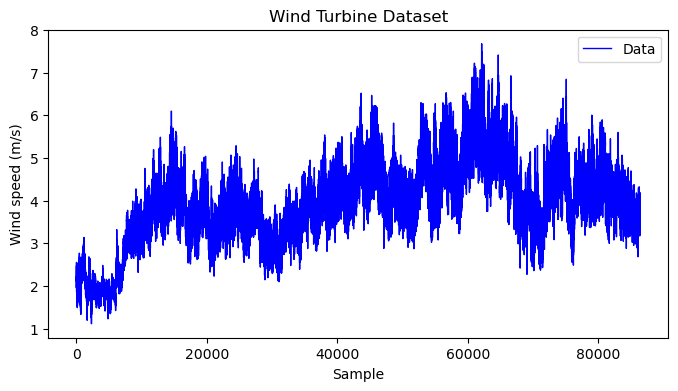

In [42]:
file_path = r"C:\Users\claud\Downloads\dataDUFU0J\isfs_1Hz_20101122.nc"
ds = nc.Dataset(file_path, mode='r')  # 'r' means read-only

# Print file information
print(ds)

# Access variables
print(ds.variables.keys())

# Example: read a variable
spd = ds.variables['spd_max'][:]  # Replace 'temperature' with your variable name
v = [np.mean(spd[i]) for i in range(len(spd))]

PlotSingle(y=v,w=8,yname=r'Wind speed (m/s)', xname='Sample', title='Wind Turbine Dataset',pltly=False)
ds.close()

In [ ]:
df = pd.DataFrame()
df['speed'] = v
path = 'C:\ControleRobustoArtigo\WindSpeed_V0.csv'
df.to_csv(path, index=False)

--- Generating Matplotlib Plot ---
Gráfico salvo como 'plot.png'


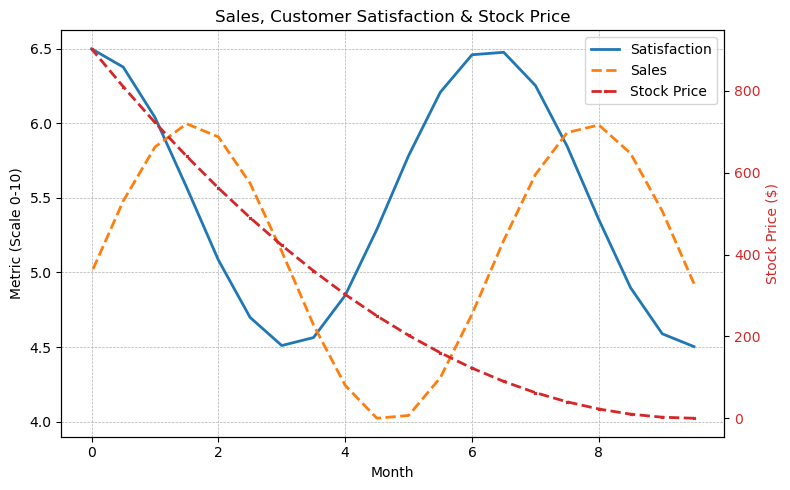

In [4]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

def PlotSeries2(y_arrays1, x_arrays=None, y_array2=None, w=8, h=5, lw=2, ms=2, mrkr=None,
               title='', xname='x', yname='y', yname2='y2', legend_labels=None, legend_label2='Secondary Series',
               pltly=True, save=False, file_name='plot.png', return_fig=False):
    """
    Plots multiple data series, with an option for a secondary y-axis.

    - y_arrays1 (list of lists): Data series for the primary (left) y-axis.
    - x_arrays (list of lists): Corresponding x-values for y_arrays1.
    - y_array2 (list/array): Optional single data series for the secondary (right) y-axis.
    - yname2 (str): Label for the secondary y-axis.
    - legend_label2 (str): Legend entry for the secondary series.
    
    If return_fig=True, the function returns the figure object instead of displaying it.
    """

    if x_arrays is None:
        x_arrays = [np.arange(len(y)) for y in y_arrays1]
    if legend_labels is None:
        legend_labels = [f'Série {i+1}' for i in range(len(y_arrays1))]
    
    # Flip for consistent plotting order (e.g., actual vs. forecast)
    x_arrays_flipped = np.flip(np.array(x_arrays, dtype=object))
    y_arrays1_flipped = np.flip(np.array(y_arrays1, dtype=object))
    legend_labels_flipped = np.flip(np.array(legend_labels))
    
    # --- Plotly Backend ---
    if pltly:
        traces = []
        # Plot primary series
        dash_styles = [None, 'dash', 'dot', 'dashdot'] # More styles for more lines
        for i, (x, y, name) in enumerate(zip(x_arrays_flipped, y_arrays1_flipped, legend_labels_flipped)):
            trace = go.Scatter(x=x, y=y, name=name, mode='lines+markers',
                               line=dict(width=lw, dash=dash_styles[i % len(dash_styles)]), 
                               marker=dict(size=ms))
            traces.append(trace)
        
        layout = go.Layout(width=w*100, height=h*100, title=title,
                           xaxis_title=xname, yaxis_title=yname,
                           legend_title_text='Legenda')
        
        # Plot secondary series if it exists
        if y_array2 is not None:
            # Assumes y_array2 shares the x-axis of the first primary series
            x_for_y2 = x_arrays_flipped[0]
            trace2 = go.Scatter(x=x_for_y2, y=y_array2, name=legend_label2,
                                mode='lines+markers', yaxis='y2',
                                line=dict(width=lw, color='rgba(255, 127, 14, 0.8)', dash='longdash'),
                                marker=dict(size=ms, symbol='cross'))
            traces.append(trace2)
            
            # Update layout to include the second y-axis
            layout.yaxis2 = dict(
                title=yname2,
                overlaying='y',
                side='right'
            )
            
        fig = go.Figure(data=traces, layout=layout)
        
        if return_fig:
            return fig
        fig.show()
        if save:
            try:
                fig.write_image(file_name, scale=5)
                print(f"Gráfico salvo como '{file_name}'")
            except ValueError as e:
                print(f"Erro ao salvar a imagem: {e}\nInstale 'kaleido': pip install -U kaleido")
    
    # --- Matplotlib Backend ---
    else:
        fig, ax1 = plt.subplots(figsize=(w, h))
        all_lines = [] # To store line objects for the unified legend
        
        # Plot primary series
        linestyle_ = ['-', '--', ':', '-.']
        for i, (x, y, label) in enumerate(zip(x_arrays_flipped, y_arrays1_flipped, legend_labels_flipped)):
            line = ax1.plot(x, y, linestyle=linestyle_[i % len(linestyle_)], 
                            linewidth=lw, marker=mrkr, markersize=ms, label=label)
            all_lines.extend(line)
        
        ax1.set_xlabel(xname)
        ax1.set_ylabel(yname)
        ax1.grid(True, which='major', linestyle='--', linewidth=0.5)

        # Plot secondary series if it exists
        if y_array2 is not None:
            ax2 = ax1.twinx() # Create the second axis
            color2 = 'tab:red'
            # Assumes y_array2 shares the x-axis of the first primary series
            x_for_y2 = x_arrays_flipped[0]
            line2 = ax2.plot(x_for_y2, y_array2, color=color2, linestyle='--',
                             linewidth=lw, marker='x', markersize=ms, label=legend_label2)
            ax2.set_ylabel(yname2, color=color2)
            ax2.tick_params(axis='y', labelcolor=color2)
            all_lines.extend(line2)

        ax1.set_title(title)
        # Create a single legend for all series
        labels = [l.get_label() for l in all_lines]
        ax1.legend(all_lines, labels, loc='best')
        
        fig.tight_layout()

        if return_fig:
            return fig
        
        if save:
            plt.savefig(file_name, dpi=300, bbox_inches='tight')
            print(f"Gráfico salvo como '{file_name}'")

        plt.show()
        plt.close(fig)

### Example Usage


if __name__ == "__main__":
    # Sample Data
    x_common = np.arange(0, 10, 0.5)
    
    # Two series for the primary (left) axis
    y1_primary = np.sin(x_common) + 5
    y2_primary = np.cos(x_common) + 5.5
    
    # One series for the secondary (right) axis with a different scale
    y_secondary = x_common**2 * 10
    
    print("--- Generating Matplotlib Plot ---")
    PlotSeries2(
        y_arrays1=[y1_primary, y2_primary],
        x_arrays=[x_common, x_common],
        y_array2=y_secondary,
        title='Sales, Customer Satisfaction & Stock Price',
        xname='Month',
        yname='Metric (Scale 0-10)',
        yname2='Stock Price ($)',
        legend_labels=['Sales', 'Satisfaction'],
        legend_label2='Stock Price',
        pltly=False,
        save=True
    )
    